In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# import plotly.express as px


##DATA CLEANING

In [ ]:
branch_df = pd.read_csv('Branch_ID_Master.csv')
city_master_df = pd.read_excel('City_Master.xlsx')
loan_details_df = pd.read_csv('Loan_Details_transactions.csv')
loan_status_df = pd.read_csv('Loan_status_mapping.csv')
postal_code_master_df = pd.read_excel('Postal_Code_Master.xlsx')
region_master_df = pd.read_excel('Region_Master.xlsx')
state_master_df = pd.read_excel('State_Master.xlsx')
state_region_mapping_df = pd.read_excel('State_Region_Mapping.xlsx')

In [ ]:
# Ensure unique branch IDs
branch_df.drop_duplicates(subset='Branch_Id', inplace=True)
# Check for missing values
branch_df.isnull().sum()


Branch_Id      0
Region_Code    0
dtype: int64

In [ ]:
# Check for missing values
loan_details_df.isnull().sum()

# Drop rows with missing values
loan_details_df.dropna(inplace=True)

# Convert data types
loan_details_df['Disbursed_Amount'] = loan_details_df['Disbursed_Amount'].astype(float)
loan_details_df['Asset_Cost'] = loan_details_df['Asset_Cost'].astype(float)
loan_details_df['ltv'] = loan_details_df['ltv'].astype(float)
loan_details_df['Date_of_Birth'] = pd.to_datetime(loan_details_df['Date_of_Birth'], format='%d-%m-%Y')


In [ ]:
# Ensure binary values for loan default status
loan_status_df['Loan_Default'] = loan_status_df['Loan_Default'].apply(lambda x: 1 if x == 1 else 0)
# Check for duplicates
loan_status_df.drop_duplicates(subset='Loan_Id', inplace=True)
# Check for missing values
loan_status_df.isnull().sum()


Loan_Id         0
Loan_Default    0
dtype: int64

In [ ]:
# Check for missing values
city_master_df.isnull().sum()
# Ensure unique city codes
city_master_df.drop_duplicates(subset='City_Code', inplace=True)


In [ ]:
# Check for missing values
postal_code_master_df.isnull().sum()
# Ensure unique postal codes
postal_code_master_df.drop_duplicates(subset='Postal_Code', inplace=True)


In [ ]:
# Check for missing values
region_master_df.isnull().sum()
# Ensure unique region IDs
region_master_df.drop_duplicates(subset='Region_ID', inplace=True)


In [ ]:
# Check for missing values
state_region_mapping_df.isnull().sum()
# Ensure consistent region and state codes
state_region_mapping_df.drop_duplicates(subset=['Region_ID', 'State_Code'], inplace=True)


In [ ]:
# Check for missing values
state_master_df.isnull().sum()
# Ensure unique state codes
state_master_df.drop_duplicates(subset='State_Code', inplace=True)


##DATA VISUALIZATIONS

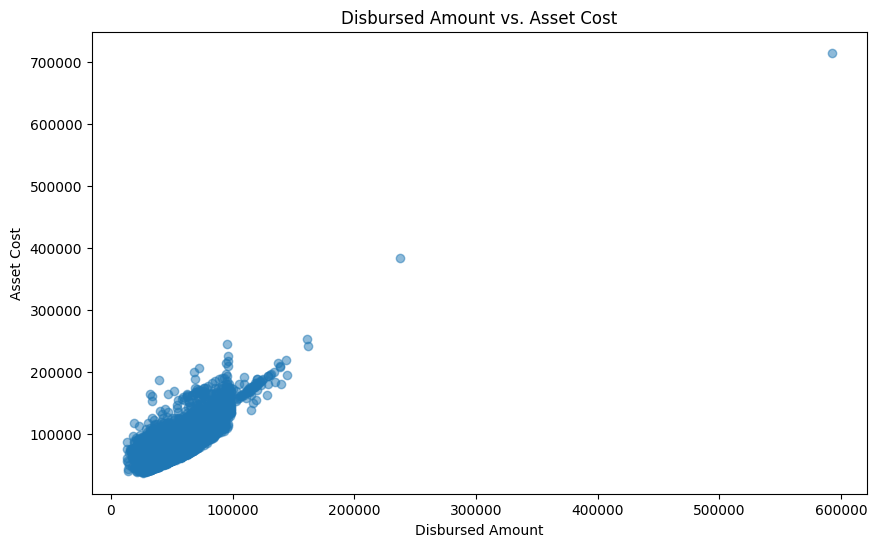

In [ ]:
# Disbursed Amount vs. Asset Cost


plt.figure(figsize=(10, 6))
plt.scatter(loan_details_df['Disbursed_Amount'], loan_details_df['Asset_Cost'], alpha=0.5)
plt.title('Disbursed Amount vs. Asset Cost')
plt.xlabel('Disbursed Amount')
plt.ylabel('Asset Cost')
plt.show()


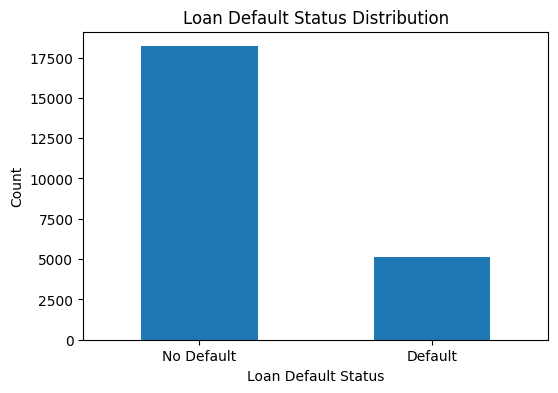

In [ ]:
# Loan Default Status Distribution

loan_default_counts = loan_status_df['Loan_Default'].value_counts()
plt.figure(figsize=(6, 4))
loan_default_counts.plot(kind='bar')
plt.title('Loan Default Status Distribution')
plt.xlabel('Loan Default Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Default', 'Default'], rotation=0)
plt.show()

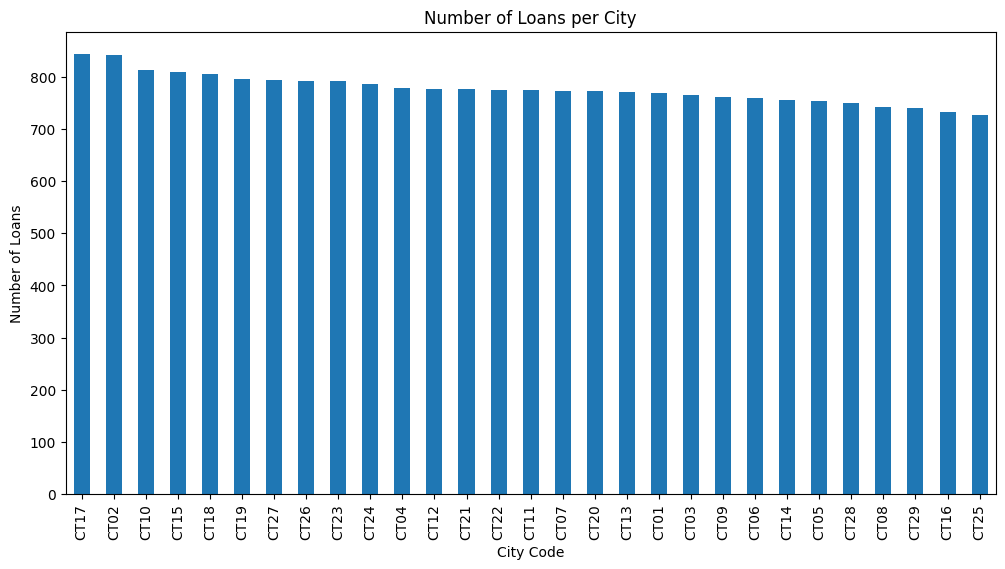

In [ ]:
# Number of Loans per City

loans_per_city = loan_details_df['City_Code'].value_counts()
plt.figure(figsize=(12, 6))
loans_per_city.plot(kind='bar')
plt.title('Number of Loans per City')
plt.xlabel('City Code')
plt.ylabel('Number of Loans')
plt.show()


##Interactive Visualiztion Using Plotly.

In [ ]:
# Interactive Scatter Plot
fig = px.scatter(loan_details_df, x='Disbursed_Amount', y='Asset_Cost', color='City_Code',
                 title='Disbursed Amount vs. Asset Cost by City')
fig.show()


In [ ]:
# Get value counts and reset the index
loan_default_counts = loan_status_df['Loan_Default'].value_counts().reset_index()
loan_default_counts.columns = ['Loan_Default', 'Count']

# Create the bar chart
fig = px.bar(loan_default_counts, x='Loan_Default', y='Count',
             title='Loan Default Status Distribution',
             labels={'Loan_Default': 'Loan Default Status', 'Count': 'Count'})
fig.show()

In [ ]:
# Interactive Line Plot: Disbursed Amount Over Time

# Ensure 'Date_of_Birth' is in datetime format
loan_details_df['Date_of_Birth'] = pd.to_datetime(loan_details_df['Date_of_Birth'], format='%d-%m-%Y')

fig4 = px.line(loan_details_df, x='Date_of_Birth', y='Disbursed_Amount', title='Disbursed Amount Over Time')
fig4.show()


In [ ]:
# Interactive Histogram: Distribution of Loan to Value (LTV) Ratios

fig5 = px.histogram(loan_details_df, x='ltv', nbins=50, title='Distribution of Loan to Value (LTV) Ratios')
fig5.show()


In [ ]:
# Interactive Pie Chart: Distribution of Employment Types

fig6 = px.pie(loan_details_df, names='Employment_Type', title='Distribution of Employment Types')
fig6.show()


In [ ]:
# Interactive Bar Chart: Number of Loans per State

# Get value counts and reset the index
loans_per_state = loan_details_df['State_Code'].value_counts().reset_index()
loans_per_state.columns = ['State_Code', 'Count']

# Create the bar chart
fig7 = px.bar(loans_per_state, x='State_Code', y='Count',
              title='Number of Loans per State',
              labels={'State_Code': 'State Code', 'Count': 'Number of Loans'})
fig7.show()

